在这个教程中，你将会学到怎么将OD数据集计到行政区划，并绘制OD期望线

<div class="alert alert-info"><h2>提供的基础数据是：</h2><p>

<br>
    GIS文件：<br>
    1.深圳行政区划<br>
    2.深圳栅格<br>
    <br>
    数据：<br>
    1.出租车GPS集计栅格OD<br>

</div>

In [5]:
#导入必要的包
import pandas as pd
import numpy as np

#绘制图用的包
import matplotlib as mpl
import matplotlib.pyplot as plt

#geopandas包
import geopandas

#shapely包
from shapely.geometry import Point,Polygon,shape

# 读取基础数据

## GIS数据

<AxesSubplot:>

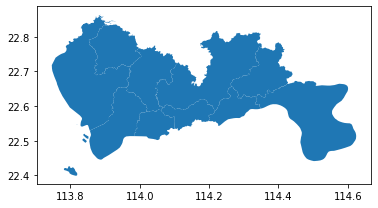

In [6]:
#行政区划数据
#读取shapefile文件
shp = r'shapefile\sz.shp'
xzqh = geopandas.GeoDataFrame.from_file(shp,encoding = 'utf-8')

#绘制看看长什么样
xzqh.plot()

<AxesSubplot:>

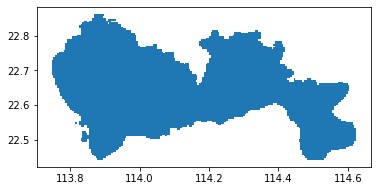

In [7]:
#栅格数据
#读取shapefile文件
shp = r'shapefile\grid\grid.shp'
grid = geopandas.GeoDataFrame.from_file(shp,encoding = 'gbk')

#绘制看看长什么样
grid.plot()

## 栅格OD数据

这个数据是前面教程2中，用公式计算出来的OD

In [8]:
OD = pd.read_csv(r'data-sample\taxi_od_grid.csv')
OD.head(5)

,SLONCOL,SLATCOL,ELONCOL,ELATCOL,VehicleNum
0,63,17,65,16,298
1,75,21,74,19,275
2,63,18,65,16,235
3,76,21,74,19,173
4,65,17,63,18,172


# 栅格与小区、行政区的匹配

## 栅格中心点获取

In [9]:
#栅格所带的字段信息
grid.head(5)

,LONCOL,LATCOL,HBLON,HBLAT,geometry
0,0,54,113.749504,22.688405,"POLYGON ((113.74707 22.68616, 113.74707 22.690..."
1,0,55,113.749504,22.692902,"POLYGON ((113.74707 22.69065, 113.74707 22.695..."
2,0,56,113.749504,22.697399,"POLYGON ((113.74707 22.69515, 113.74707 22.699..."
3,0,57,113.749504,22.701895,"POLYGON ((113.74707 22.69965, 113.74707 22.704..."
4,0,58,113.749504,22.706392,"POLYGON ((113.74707 22.70414, 113.74707 22.708..."


我们现在要做的是，将栅格与行政区匹配，希望得到的是，在栅格信息的后面加一列，表示这个栅格属于哪个行政区划

在这里，我们考虑以栅格中心点落在哪个空间单元来判断，比如某栅格中心点落在宝安区，那么认为这个栅格是宝安区的栅格

因此，下一步我们定义一个geoDataFrame变量，命名为grid_point，存储的是栅格的中心点

<AxesSubplot:>

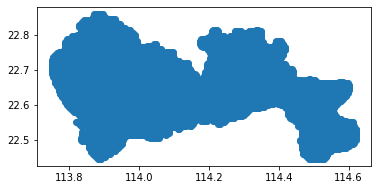

In [10]:
grid_point = grid.copy()
#我们相当于把geometry这一列的信息由polygon改成point
grid_point['geometry'] = grid.centroid

grid_point.plot()

In [11]:
grid_point.head(5)

,LONCOL,LATCOL,HBLON,HBLAT,geometry
0,0,54,113.749504,22.688405,POINT (113.74950 22.68841)
1,0,55,113.749504,22.692902,POINT (113.74950 22.69290)
2,0,56,113.749504,22.697399,POINT (113.74950 22.69740)
3,0,57,113.749504,22.701895,POINT (113.74950 22.70190)
4,0,58,113.749504,22.706392,POINT (113.74950 22.70639)


## 空间连接sjoin

在对栅格和行政区划连接时，要用到<a href="http://geopandas.org/mergingdata.html">geopandas的sjoin</a>方法

In [12]:
#连接到行政区划
grid_point = geopandas.sjoin(grid_point, xzqh, how="inner", op='intersects')
grid_point.head(5)
grid_point

d:\python\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,LONCOL,LATCOL,HBLON,HBLAT,geometry,index_right,centroid_x,centroid_y,qh
2,0,56,113.749504,22.697399,POINT (113.74950 22.69740),3,113.851387,22.679120,宝安
3,0,57,113.749504,22.701895,POINT (113.74950 22.70190),3,113.851387,22.679120,宝安
4,0,58,113.749504,22.706392,POINT (113.74950 22.70639),3,113.851387,22.679120,宝安
5,0,59,113.749504,22.710888,POINT (113.74950 22.71089),3,113.851387,22.679120,宝安
6,0,60,113.749504,22.715385,POINT (113.74950 22.71539),3,113.851387,22.679120,宝安
...,...,...,...,...,...,...,...,...,...
8998,179,13,114.621702,22.504045,POINT (114.62170 22.50404),8,114.502205,22.571337,大鹏
8999,179,14,114.621702,22.508541,POINT (114.62170 22.50854),8,114.502205,22.571337,大鹏
9000,179,15,114.621702,22.513038,POINT (114.62170 22.51304),8,114.502205,22.571337,大鹏
9001,179,16,114.621702,22.517534,POINT (114.62170 22.51753),8,114.502205,22.571337,大鹏


<AxesSubplot:>

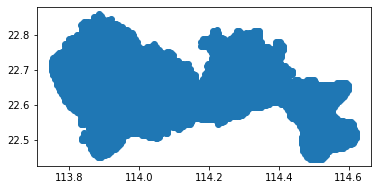

In [13]:
grid_point.plot()

In [14]:
#只取我们要的列
grid_point = grid_point[['LONCOL','LATCOL','qh','centroid_x','centroid_y']]

## 把OD表的起点终点和grid_point表连接

这里我们用[df.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge)，把OD和grid_point表连接起来 

In [15]:
###########################你需要在下面写代码#############################
#重命名grid_point 并用 df.merge 把 OD 和 grid_point 表merge起来 
#只有当要合并的列在两个表中的名称相同时，merge方法才起作用

###################################################################################

OD.head(5)

,SLONCOL,SLATCOL,ELONCOL,ELATCOL,VehicleNum
0,63,17,65,16,298
1,75,21,74,19,275
2,63,18,65,16,235
3,76,21,74,19,173
4,65,17,63,18,172


In [16]:
###############################     答案   ##################################
grid_point.columns = ['SLONCOL','SLATCOL','Sqh','S_x','S_y']
OD = pd.merge(OD,grid_point,on = ['SLONCOL','SLATCOL'])
grid_point.columns = ['ELONCOL','ELATCOL','Eqh','E_x','E_y']
OD = pd.merge(OD,grid_point,on = ['ELONCOL','ELATCOL'])
###################################################################################

## 集计行政区划的OD

In [17]:
#集计行政区划的OD
###########################你需要在下面写代码#############################


###################################################################################

OD.head(5)

,SLONCOL,SLATCOL,ELONCOL,ELATCOL,VehicleNum,Sqh,S_x,S_y,Eqh,E_x,E_y
0,63,17,65,16,298,福田,114.041535,22.546180,福田,114.041535,22.54618
1,75,21,65,16,139,罗湖,114.143157,22.577605,福田,114.041535,22.54618
2,63,18,65,16,235,福田,114.041535,22.546180,福田,114.041535,22.54618
3,76,21,65,16,89,罗湖,114.143157,22.577605,福田,114.041535,22.54618
4,65,17,65,16,64,福田,114.041535,22.546180,福田,114.041535,22.54618


In [18]:
#集计
###############################     答案   ##################################
OD = OD.groupby(['Sqh','S_x','S_y','Eqh','E_x','E_y'])['VehicleNum'].sum().reset_index()
###################################################################################
OD.head(5)

,Sqh,S_x,S_y,Eqh,E_x,E_y,VehicleNum
0,光明,113.92629,22.766157,光明,113.926290,22.766157,141
1,光明,113.92629,22.766157,南山,113.930714,22.544103,8
2,光明,113.92629,22.766157,宝安,113.851387,22.679120,119
3,光明,113.92629,22.766157,福田,114.041535,22.546180,3
4,光明,113.92629,22.766157,罗湖,114.143157,22.577605,2


只保留跨行政区的出行，即Sqh与Eqh相等的就不要了

In [19]:
###########################你需要在下面写代码#############################


###################################################################################



OD.head(5)

,Sqh,S_x,S_y,Eqh,E_x,E_y,VehicleNum
0,光明,113.92629,22.766157,光明,113.926290,22.766157,141
1,光明,113.92629,22.766157,南山,113.930714,22.544103,8
2,光明,113.92629,22.766157,宝安,113.851387,22.679120,119
3,光明,113.92629,22.766157,福田,114.041535,22.546180,3
4,光明,113.92629,22.766157,罗湖,114.143157,22.577605,2


In [20]:

###############################     答案   ##################################
OD = OD[-(OD['Sqh']==OD['Eqh'])]
###################################################################################


# OD的绘制

在上一个教程中，我们学习了如何绘制栅格OD。现在我们再来一次。

In [21]:
#画期望线的时候，我们希望小的先画，大的后画，这样大的OD就会在最上面
###########################你需要在下面写代码#############################


###################################################################################




OD.head(5)

,Sqh,S_x,S_y,Eqh,E_x,E_y,VehicleNum
1,光明,113.92629,22.766157,南山,113.930714,22.544103,8
2,光明,113.92629,22.766157,宝安,113.851387,22.679120,119
3,光明,113.92629,22.766157,福田,114.041535,22.546180,3
4,光明,113.92629,22.766157,罗湖,114.143157,22.577605,2
5,光明,113.92629,22.766157,龙华,114.029687,22.686910,57


In [22]:
###############################     答案   ##################################
OD = OD.sort_values(by = 'VehicleNum')
###################################################################################
OD.head(5)

,Sqh,S_x,S_y,Eqh,E_x,E_y,VehicleNum
30,大鹏,114.502205,22.571337,龙岗,114.206790,22.695694,1
26,大鹏,114.502205,22.571337,宝安,113.851387,22.679120,1
24,大鹏,114.502205,22.571337,坪山,114.356936,22.691020,1
21,坪山,114.356936,22.691020,罗湖,114.143157,22.577605,1
19,坪山,114.356936,22.691020,宝安,113.851387,22.679120,1


## 开始画图

In [23]:
#导入绘图包
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
#开搞
###########################你需要在下面写代码#############################
#创建图

#画行政区划shp

#定义colormap

#for循环

    #定义颜色和线宽color， linewidth

    #画OD

    
#不显示坐标轴

#假的colorbar

#设置 xlim ylim

###################################################################################
plt.show()

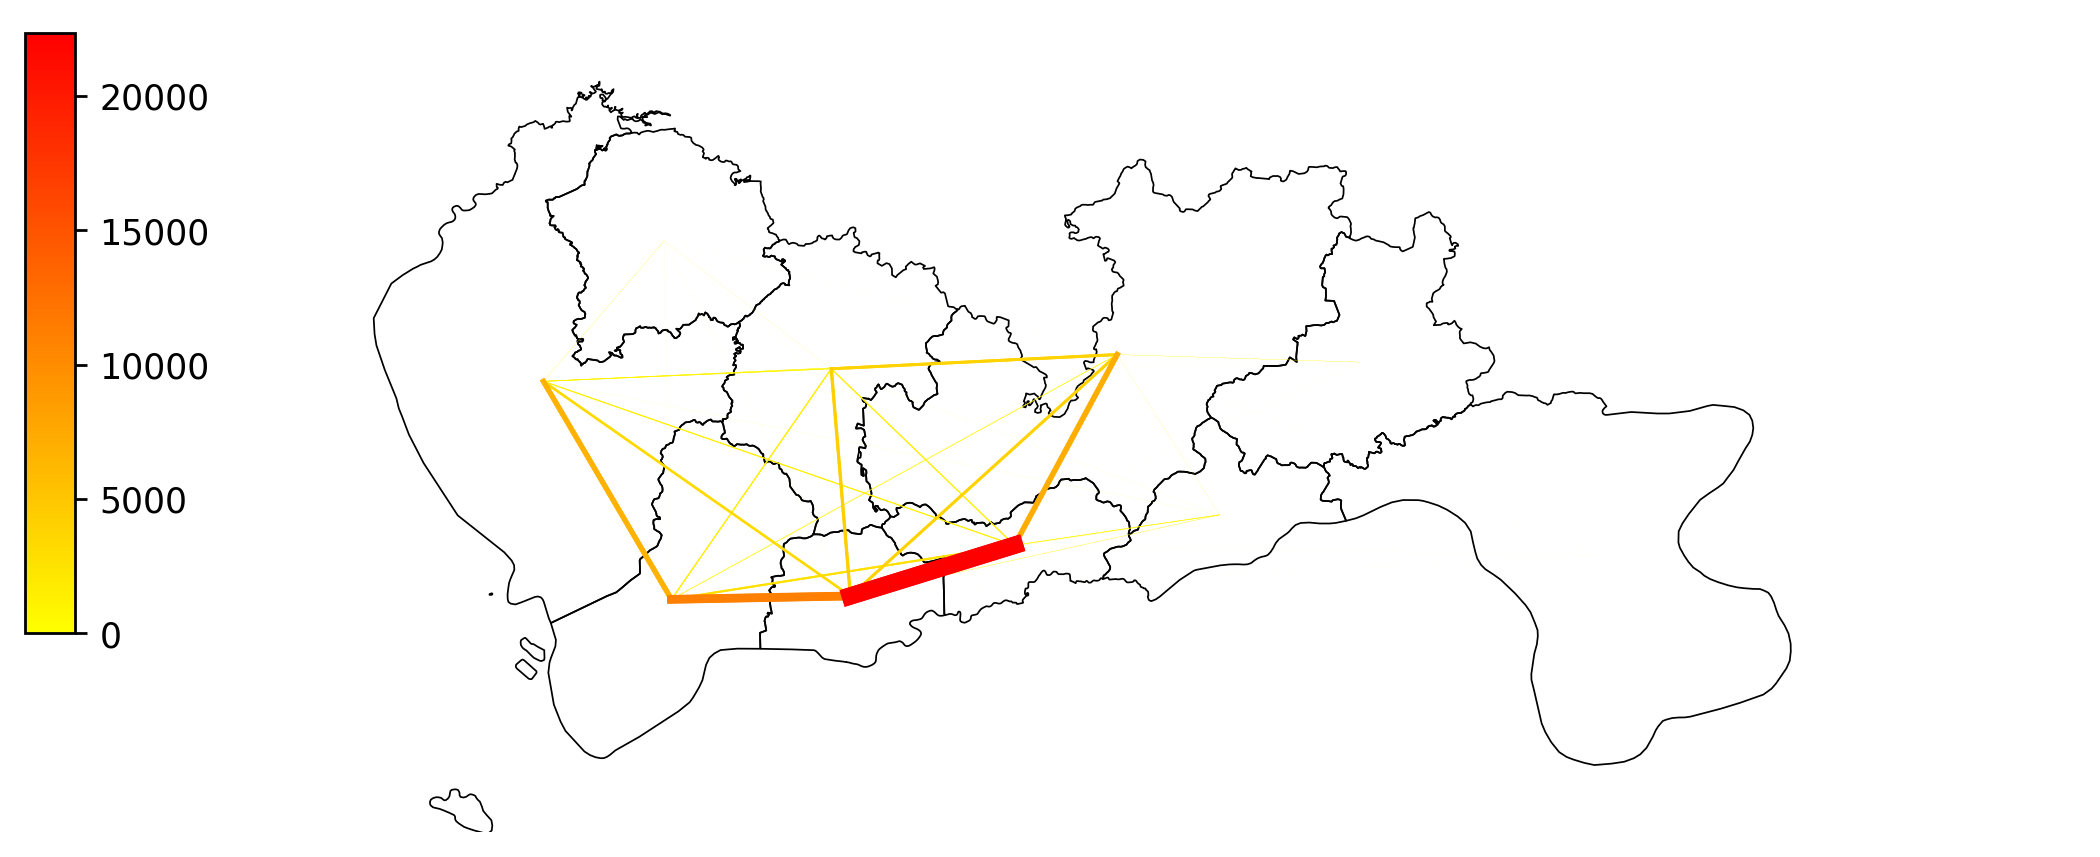

In [25]:
###############################     答案   ##################################

fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#绘制行政区划
xzqh.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

#设置colormap的数据
import matplotlib
vmax = OD['VehicleNum'].max()
#设定一个标准化的工具，设定OD的colormap最大最小值，他的作用是norm(count)就会将count标准化到0-1的范围内
norm = mpl.colors.Normalize(vmin=0,vmax=vmax)
#设定colormap的颜色
cmapname = 'autumn_r'
#cmap是一个获取颜色的工具，cmap(a)会返回颜色，其中a是0-1之间的值
cmap = matplotlib.cm.get_cmap(cmapname)

#绘制OD
for i in range(len(OD)):
    #设定第i条线的color和linewidth
    color_i=cmap(norm(OD['VehicleNum'].iloc[i]))
    linewidth_i=norm(OD['VehicleNum'].iloc[i])*5
    
    #绘制
    plt.plot([OD['S_x'].iloc[i],OD['E_x'].iloc[i]],[OD['S_y'].iloc[i],OD['E_y'].iloc[i]],color=color_i,linewidth=linewidth_i)


    
#不显示坐标轴
plt.axis('off')    

#绘制假的colorbar，这是因为，我们画的OD是线，没办法直接画出来colorbar
#所以我们在一个看不见的地方画了一个叫imshow的东西，他的范围是0到vmax
#然后我们再对imshow添加colorbar
plt.imshow([[0,vmax]], cmap=cmap)
#设定colorbar的大小和位置
cax = plt.axes([0.08, 0.4, 0.02, 0.3])
plt.colorbar(cax=cax)

#然后要把镜头调整回到深圳地图那，不然镜头就在imshow那里了

ax.set_xlim(113.6,114.8)
ax.set_ylim(22.4,22.9)

###################################################################################

plt.show()

# 用plot_map包绘制底图

小旭学长自制plot_map包，可为专题图添加背景底图  
[Github:plot_map](https://github.com/ni1o1/plot_map/)  
这个文件已经在我们教程文件中，我们直接import

只需要用以下代码：

>plot_map(plt,bounds,zoom = 9,style = 1)


可以通过更改函数plot map中的“style”和“styleid”来更改地图样式



>bounds——设置绘图边界[lon1，lat1，lon2，lat2]（wgs1984）  
zoom——地图的缩放级别  
style——从1到7表示不同的地图样式，1-6表示openstreetmap，7表示mapbox，样式3和4不需要token  
styleid——如果style设置为7（来自mapbox），则可以在此处更改styleid，用“深色”或“浅色”或您自己的样式

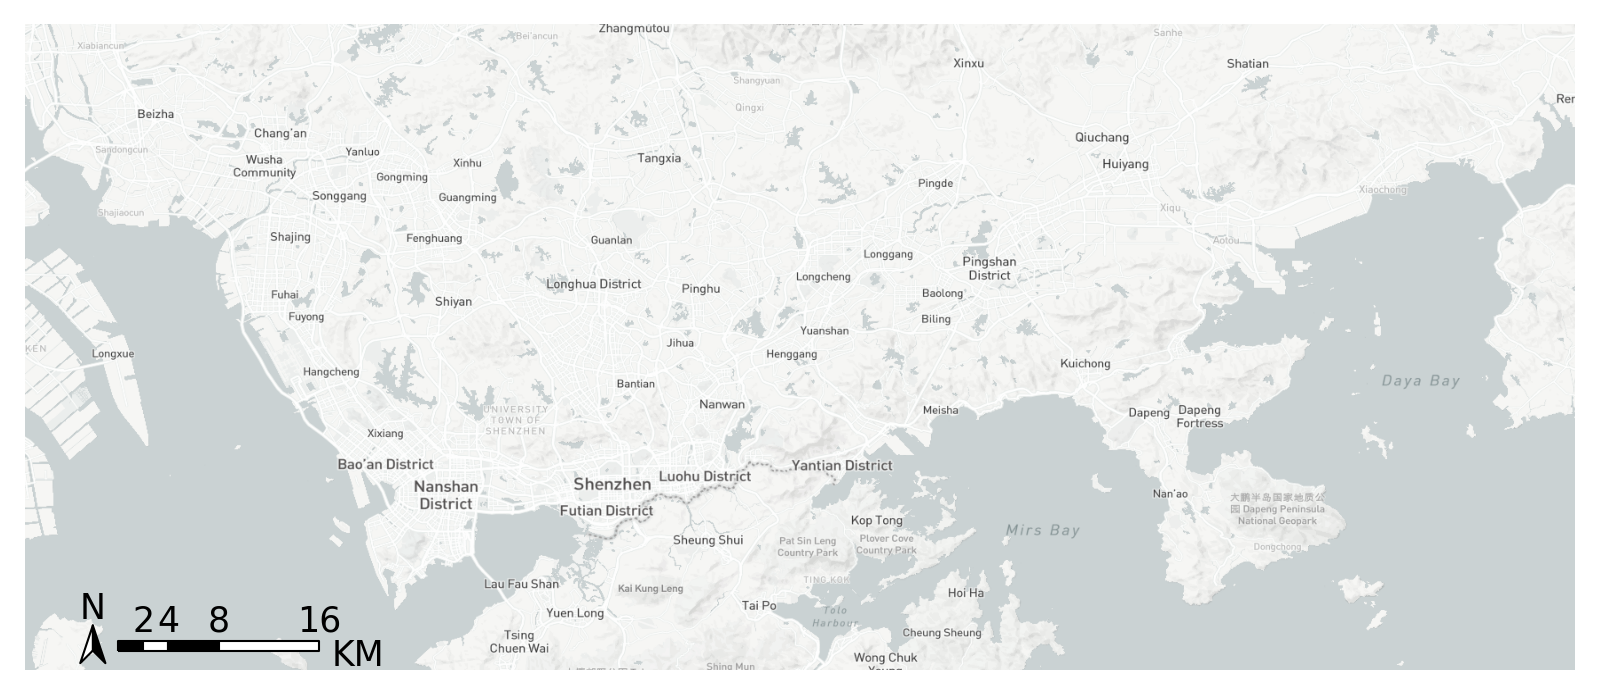

In [2]:
# 设置Mapbox  从而使用 TransBigData 包
import transbigdata as tbd
# #用下面代码设置你的mapboxtoken，如果不设置，则只能使用style=0的地图底图
# tbd.set_mapboxtoken('pk.eyJ1IjoiY2hlbnp4MjAyMCIsImEiOiJjbDc3OW1henIwN2s4M25xZmp1Z2VjM2FjIn0.Tr8BvWPTHCHTThyPIYBoBA')#必须在里面设置你申请的token，直接复制此行代码无效！
# tbd.set_imgsavepath(r'D:\pythonscript\\')
bounds = [113.6,22.4,114.8,22.9]
#创建图框
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=250)
ax =plt.subplot(111)
plt.sca(ax)
#添加地图底图
tbd.plot_map(plt,bounds,zoom = 11,style = 4)
#添加比例尺和指北针
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

In [27]:
import plot_map

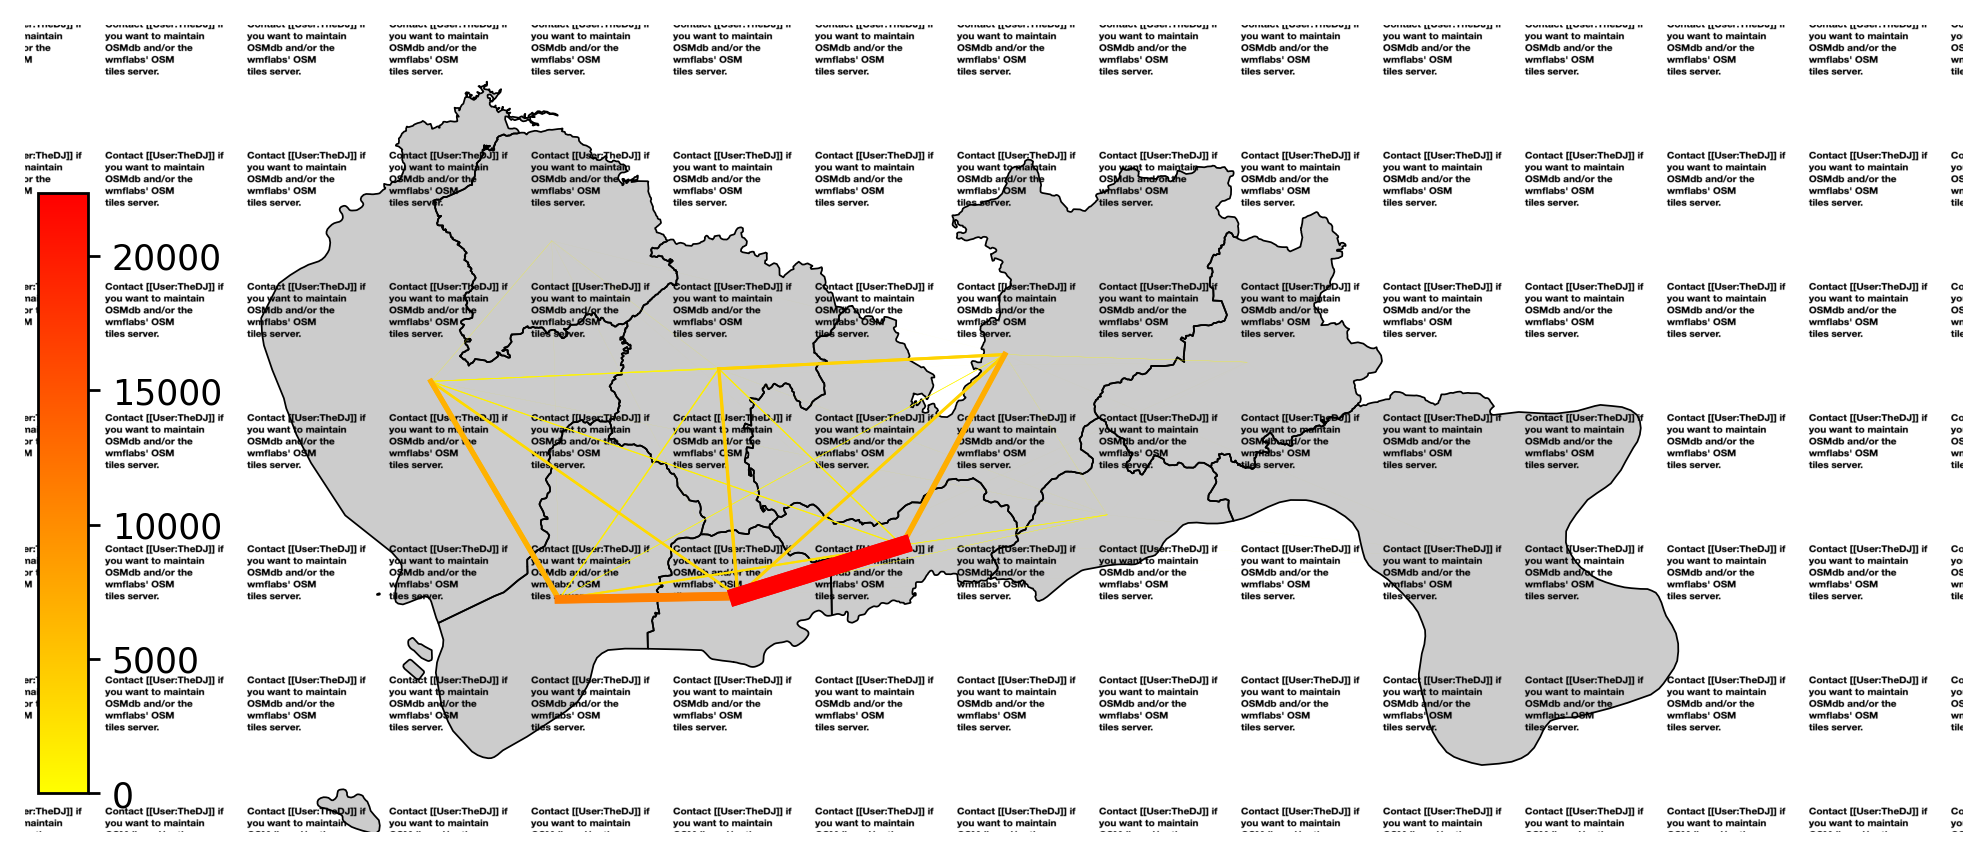

In [33]:
fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

bounds = [113.6,22.4,114.8,22.9]
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)

#绘制行政区划
xzqh.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0.2),linewidths=0.5)

#设置colormap的数据
import matplotlib
vmax = OD['VehicleNum'].max()
norm = mpl.colors.Normalize(vmin=0,vmax=vmax)
cmapname = 'autumn_r'
cmap = matplotlib.cm.get_cmap(cmapname)

#绘制OD
for i in range(len(OD)):
    color_i=cmap(norm(OD['VehicleNum'].iloc[i]))
    linewidth_i=norm(OD['VehicleNum'].iloc[i])*5
    plt.plot([OD['S_x'].iloc[i],OD['E_x'].iloc[i]],[OD['S_y'].iloc[i],OD['E_y'].iloc[i]],color=color_i,linewidth=linewidth_i)


    
#不显示坐标轴
plt.axis('off')    

#添加colorbar
plt.imshow([[0,vmax]], cmap=cmap)
#设定colorbar的大小和位置
cax = plt.axes([0.13, 0.32, 0.02, 0.3])
plt.colorbar(cax=cax)

ax.set_xlim(113.6,114.8)
ax.set_ylim(22.4,22.9)


plt.show()